In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [127]:
unemployed=pd.read_csv("/content/unemployed_population_1978-12_to_2023-07.csv")
unemployed.head()

,date,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
0,2023-07-01,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,...,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
1,2023-06-01,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2,2023-05-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
3,2023-04-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
4,2023-03-01,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,...,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000


In [128]:
unemployed.shape
unemployed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Columns: 122 entries, date to population_over_16
dtypes: float64(120), int64(1), object(1)
memory usage: 511.0+ KB


In [129]:
print(list(unemployed.columns))

['date', 'all', '16-24', '25-54', '55-64', '65+', 'less_than_hs', 'high_school', 'some_college', "bachelor's_degree", 'advanced_degree', 'women', 'women_16-24', 'women_25-54', 'women_55-64', 'women_65+', 'women_less_than_hs', 'women_high_school', 'women_some_college', "women_bachelor's_degree", 'women_advanced_degree', 'men', 'men_16-24', 'men_25-54', 'men_55-64', 'men_65+', 'men_less_than_hs', 'men_high_school', 'men_some_college', "men_bachelor's_degree", 'men_advanced_degree', 'black', 'black_16-24', 'black_25-54', 'black_55-64', 'black_65+', 'black_less_than_hs', 'black_high_school', 'black_some_college', "black_bachelor's_degree", 'black_advanced_degree', 'black_women', 'black_women_16-24', 'black_women_25-54', 'black_women_55-64', 'black_women_65+', 'black_women_less_than_hs', 'black_women_high_school', 'black_women_some_college', "black_women_bachelor's_degree", 'black_women_advanced_degree', 'black_men', 'black_men_16-24', 'black_men_25-54', 'black_men_55-64', 'black_men_65+', 

In [130]:
unemployed.isnull().sum()

date                           0
all                            0
16-24                          0
25-54                          0
55-64                          0
                              ..
white_men_high_school          0
white_men_some_college         0
white_men_bachelor's_degree    0
white_men_advanced_degree      0
population_over_16             0
Length: 122, dtype: int64

In [132]:
unemployed.describe()

,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,advanced_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,...,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,5.360000e+02
mean,6.160261,12.558769,5.090672,3.972388,3.779291,12.366978,6.896455,5.350373,3.225000,2.239179,...,11.209701,4.199440,3.661194,3.301679,11.434142,5.957836,4.573881,2.828358,1.921082,2.151410e+08
std,1.633552,2.596647,1.470262,1.191348,1.141110,2.738656,1.918958,1.538527,0.923954,0.564788,...,2.594022,1.405842,1.160561,1.102392,2.999628,1.976321,1.455055,0.845670,0.554930,3.080710e+07
min,3.600000,7.800000,3.000000,2.400000,2.400000,7.000000,4.300000,3.100000,1.900000,1.400000,...,7.000000,2.300000,2.100000,1.800000,6.700000,3.400000,2.600000,1.600000,1.100000,1.632720e+08
25%,4.900000,10.800000,4.100000,3.100000,3.100000,10.400000,5.500000,4.200000,2.600000,1.900000,...,9.400000,3.200000,2.800000,2.600000,9.300000,4.600000,3.500000,2.200000,1.500000,1.884902e+08
50%,5.800000,12.100000,4.700000,3.700000,3.400000,11.900000,6.400000,5.000000,2.900000,2.100000,...,10.700000,3.800000,3.300000,3.000000,11.000000,5.400000,4.300000,2.600000,1.800000,2.144150e+08
75%,7.300000,14.000000,5.900000,4.600000,3.900000,13.900000,7.625000,6.100000,3.500000,2.500000,...,12.400000,4.900000,4.300000,3.400000,12.425000,6.725000,5.225000,3.300000,2.200000,2.430132e+08
max,10.300000,18.700000,8.700000,7.300000,8.000000,19.000000,12.200000,9.500000,6.400000,4.100000,...,18.300000,8.300000,7.200000,6.400000,20.500000,12.100000,8.900000,5.300000,3.700000,2.670020e+08


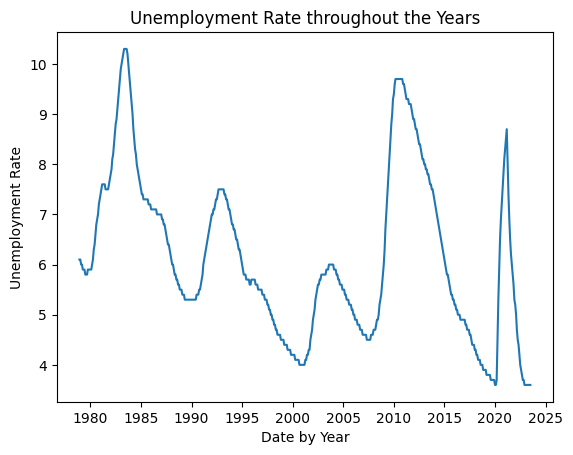

In [133]:
unemployed['date'] = pd.to_datetime(unemployed['date'])

unemployed = unemployed.sort_values(by='date')

plt.plot(unemployed['date'],unemployed['all'])
plt.xlabel('Date by Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate throughout the Years')
plt.show()

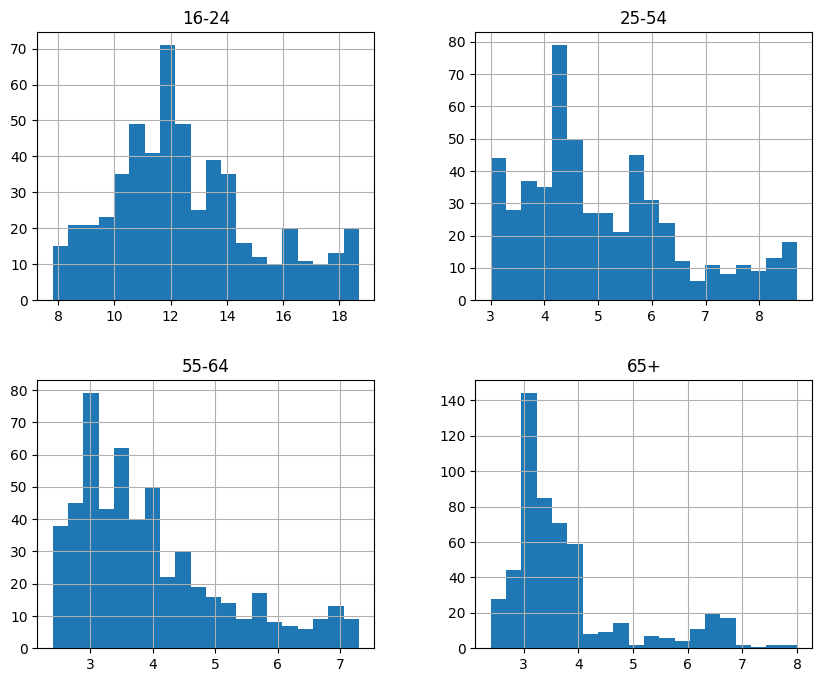

In [134]:
unemployed.hist(column=['16-24', '25-54', '55-64', '65+'], bins=20, figsize=(10, 8))
plt.xlabel("")
plt.show()

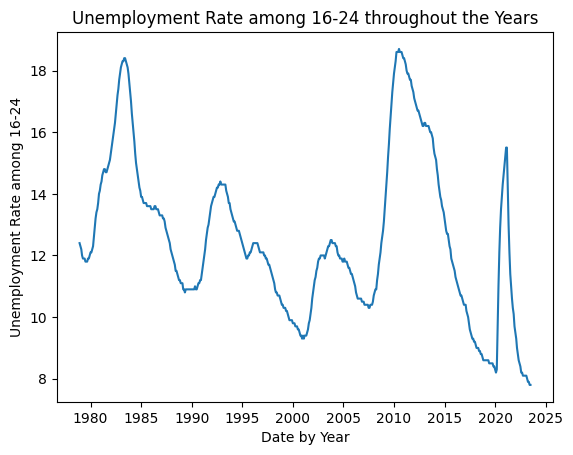

In [135]:
unemployed['date'] = pd.to_datetime(unemployed['date'])

unemployed = unemployed.sort_values(by='date')

plt.plot(unemployed['date'],unemployed['16-24'])
plt.xlabel('Date by Year')
plt.ylabel('Unemployment Rate among 16-24')
plt.title('Unemployment Rate among 16-24 throughout the Years')
plt.show()

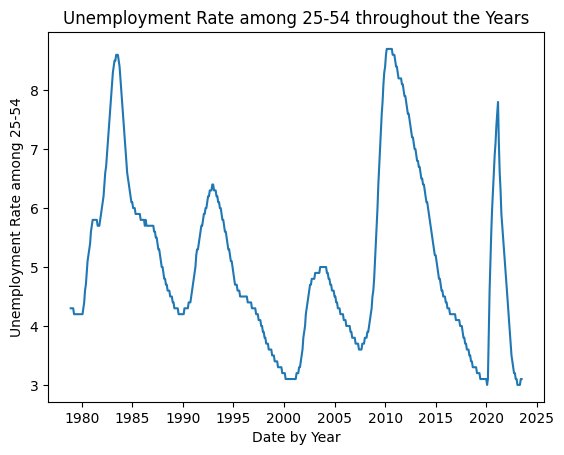

In [136]:
unemployed['date'] = pd.to_datetime(unemployed['date'])

unemployed = unemployed.sort_values(by='date')

plt.plot(unemployed['date'],unemployed['25-54'])
plt.xlabel('Date by Year')
plt.ylabel('Unemployment Rate among 25-54')
plt.title('Unemployment Rate among 25-54 throughout the Years')
plt.show()

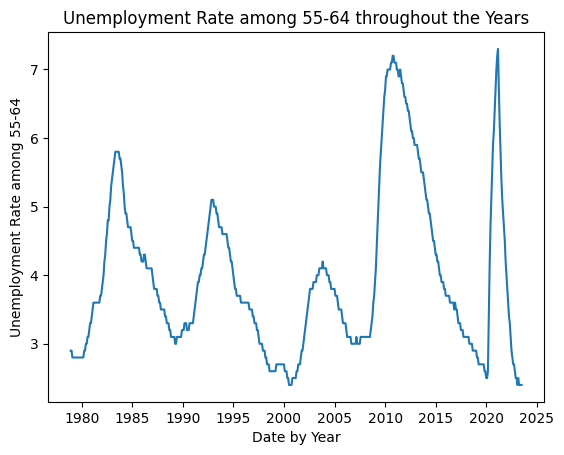

In [137]:
unemployed['date'] = pd.to_datetime(unemployed['date'])

unemployed = unemployed.sort_values(by='date')

plt.plot(unemployed['date'],unemployed['55-64'])
plt.xlabel('Date by Year')
plt.ylabel('Unemployment Rate among 55-64')
plt.title('Unemployment Rate among 55-64 throughout the Years')
plt.show()

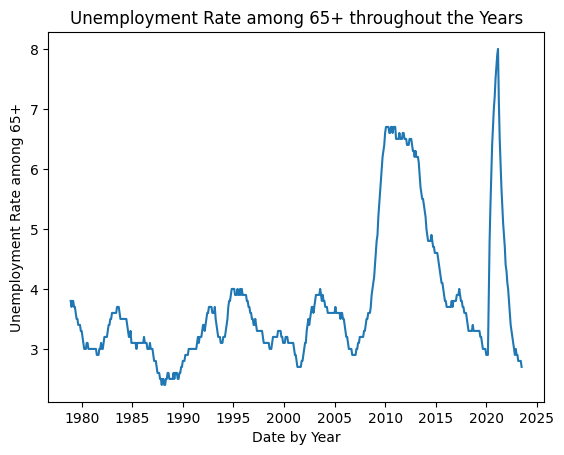

In [138]:
unemployed['date'] = pd.to_datetime(unemployed['date'])

unemployed = unemployed.sort_values(by='date')

plt.plot(unemployed['date'],unemployed['65+'])
plt.xlabel('Date by Year')
plt.ylabel('Unemployment Rate among 65+')
plt.title('Unemployment Rate among 65+ throughout the Years')
plt.show()

In [139]:
unemployed_correlation=unemployed.corr()
unemployed_correlation

<ipython-input-139-52aacedffd40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  unemployed_correlation=unemployed.corr()


,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,advanced_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
all,1.000000,0.979642,0.984525,0.880878,0.550490,0.941310,0.931715,0.942121,0.813932,0.748130,...,0.944064,0.956514,0.882093,0.519594,0.848554,0.920047,0.931952,0.766871,0.591609,-0.302792
16-24,0.979642,1.000000,0.963685,0.874668,0.590853,0.966791,0.926861,0.928355,0.805969,0.755519,...,0.974615,0.940396,0.879190,0.573611,0.894520,0.923931,0.925284,0.772931,0.603980,-0.266833
25-54,0.984525,0.963685,1.000000,0.942108,0.644102,0.944910,0.973380,0.973774,0.882772,0.826270,...,0.949906,0.986676,0.941373,0.615442,0.898492,0.962841,0.972799,0.853647,0.699963,-0.153422
55-64,0.880878,0.874668,0.942108,1.000000,0.823642,0.885640,0.971661,0.965963,0.964116,0.938469,...,0.883266,0.940079,0.978961,0.791017,0.914460,0.945402,0.964226,0.956242,0.867077,0.127237
65+,0.550490,0.590853,0.644102,0.823642,1.000000,0.585857,0.768973,0.767038,0.889622,0.901176,...,0.637412,0.642772,0.756609,0.975209,0.731793,0.722403,0.752616,0.864102,0.890587,0.494326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white_men_high_school,0.920047,0.923931,0.962841,0.945402,0.722403,0.909132,0.984334,0.958896,0.905539,0.862731,...,0.965519,0.982122,0.952559,0.718233,0.953932,1.000000,0.984974,0.902307,0.775186,0.048505
white_men_some_college,0.931952,0.925284,0.972799,0.964226,0.752616,0.902552,0.986758,0.982058,0.943085,0.898301,...,0.948343,0.980672,0.963310,0.738291,0.925101,0.984974,1.000000,0.926102,0.804988,0.027446
white_men_bachelor's_degree,0.766871,0.772931,0.853647,0.956242,0.864102,0.788939,0.910497,0.905246,0.971347,0.961788,...,0.818025,0.880133,0.950185,0.858420,0.885693,0.902307,0.926102,1.000000,0.939024,0.296018
white_men_advanced_degree,0.591609,0.603980,0.699963,0.867077,0.890587,0.629124,0.790080,0.784621,0.910747,0.951090,...,0.663639,0.736232,0.840265,0.881525,0.767978,0.775186,0.804988,0.939024,1.000000,0.469565


In [140]:
age_group_comparison = unemployed[['16-24', '25-54', '55-64', '65+']].mean()
age_group_comparison

16-24    12.558769
25-54     5.090672
55-64     3.972388
65+       3.779291
dtype: float64

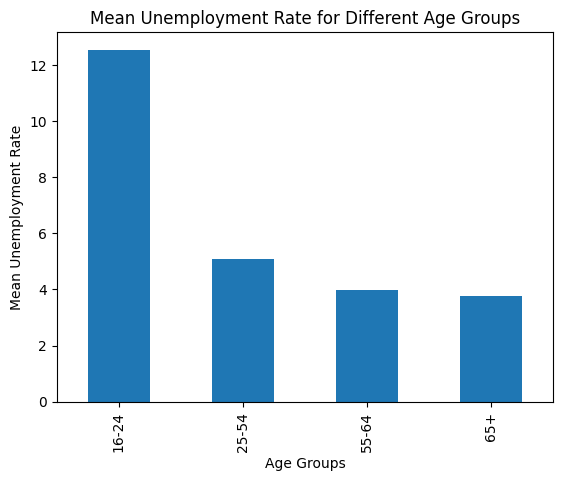

In [141]:
age_group_comparison = unemployed[['16-24', '25-54', '55-64', '65+']].mean()

age_group_comparison.plot(kind='bar')
plt.xlabel('Age Groups')
plt.ylabel('Mean Unemployment Rate')
plt.title('Mean Unemployment Rate for Different Age Groups')
plt.show()

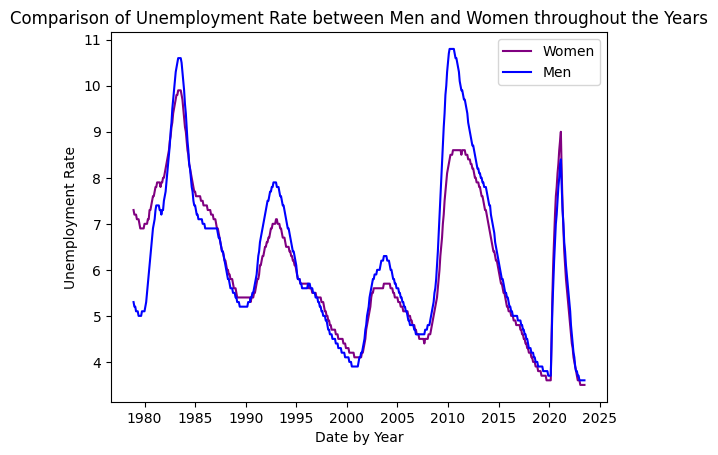

In [142]:
unemployed['date'] = pd.to_datetime(unemployed['date'])
unemployed = unemployed.sort_values(by='date')

plt.plot(unemployed['date'],unemployed['women'], color='purple', label = 'Women')
plt.plot(unemployed['date'],unemployed['men'], color='blue', label='Men')

plt.xlabel('Date by Year')
plt.ylabel('Unemployment Rate')
plt.title('Comparison of Unemployment Rate between Men and Women throughout the Years')
plt.legend()
plt.show()

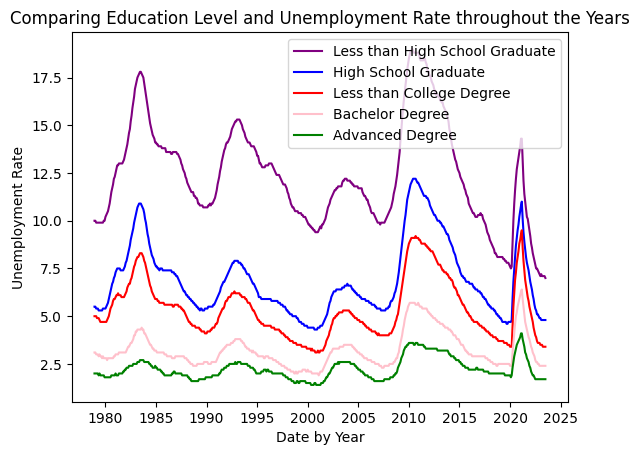

In [143]:
unemployed['date'] = pd.to_datetime(unemployed['date'])
unemployed = unemployed.sort_values(by='date')

plt.plot(unemployed['date'],unemployed['less_than_hs'], color='purple', label = 'Less than High School Graduate')
plt.plot(unemployed['date'],unemployed['high_school'], color='blue', label='High School Graduate')
plt.plot(unemployed['date'],unemployed['some_college'], color='red', label = 'Less than College Degree')
plt.plot(unemployed['date'],unemployed["bachelor's_degree"], color='pink', label='Bachelor Degree')
plt.plot(unemployed['date'],unemployed['advanced_degree'], color='green', label='Advanced Degree')

plt.xlabel('Date by Year')
plt.ylabel('Unemployment Rate')
plt.title('Comparing Education Level and Unemployment Rate throughout the Years')
plt.legend()
plt.show()

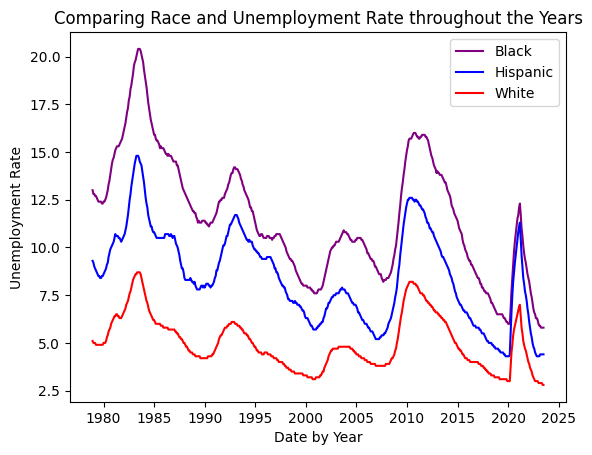

In [144]:
unemployed['date'] = pd.to_datetime(unemployed['date'])
unemployed = unemployed.sort_values(by='date')

plt.plot(unemployed['date'],unemployed['black'], color='purple', label = 'Black')
plt.plot(unemployed['date'],unemployed['hispanic'], color='blue', label='Hispanic')
plt.plot(unemployed['date'],unemployed['white'], color='red', label = 'White')


plt.xlabel('Date by Year')
plt.ylabel('Unemployment Rate')
plt.title('Comparing Race and Unemployment Rate throughout the Years')
plt.legend()
plt.show()

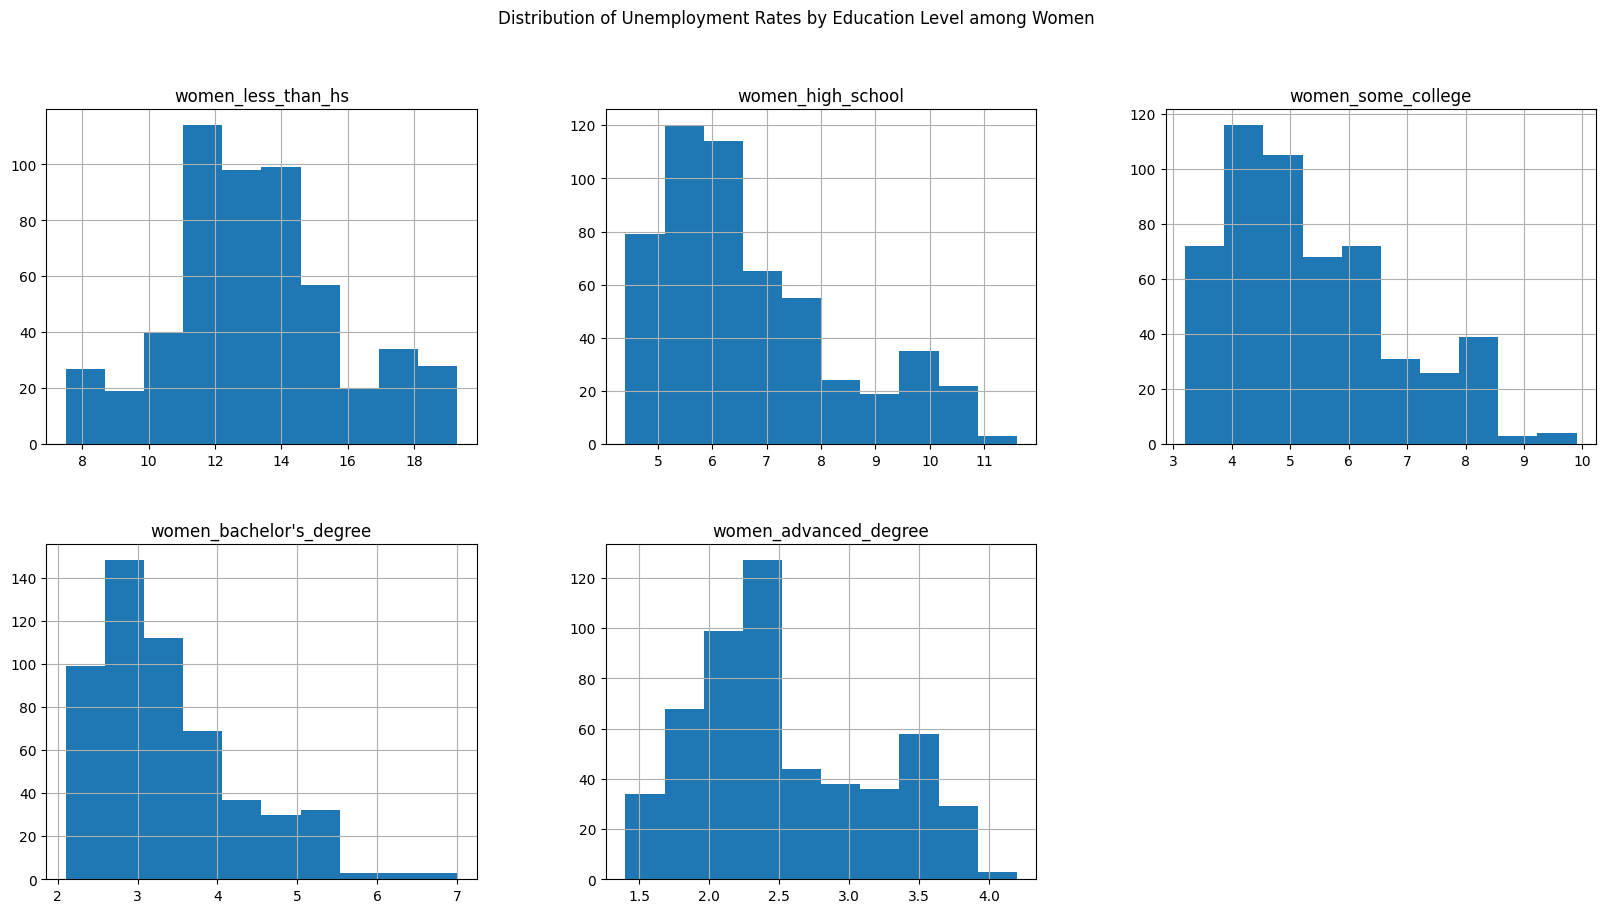

In [154]:
women_education_cols = ["women_less_than_hs", "women_high_school", "women_some_college", "women_bachelor's_degree", "women_advanced_degree"]

unemployed[women_education_cols].hist(bins=10, figsize=(20,10), layout=(2,3) )
plt.suptitle("Distribution of Unemployment Rates by Education Level among Women")
plt.show()

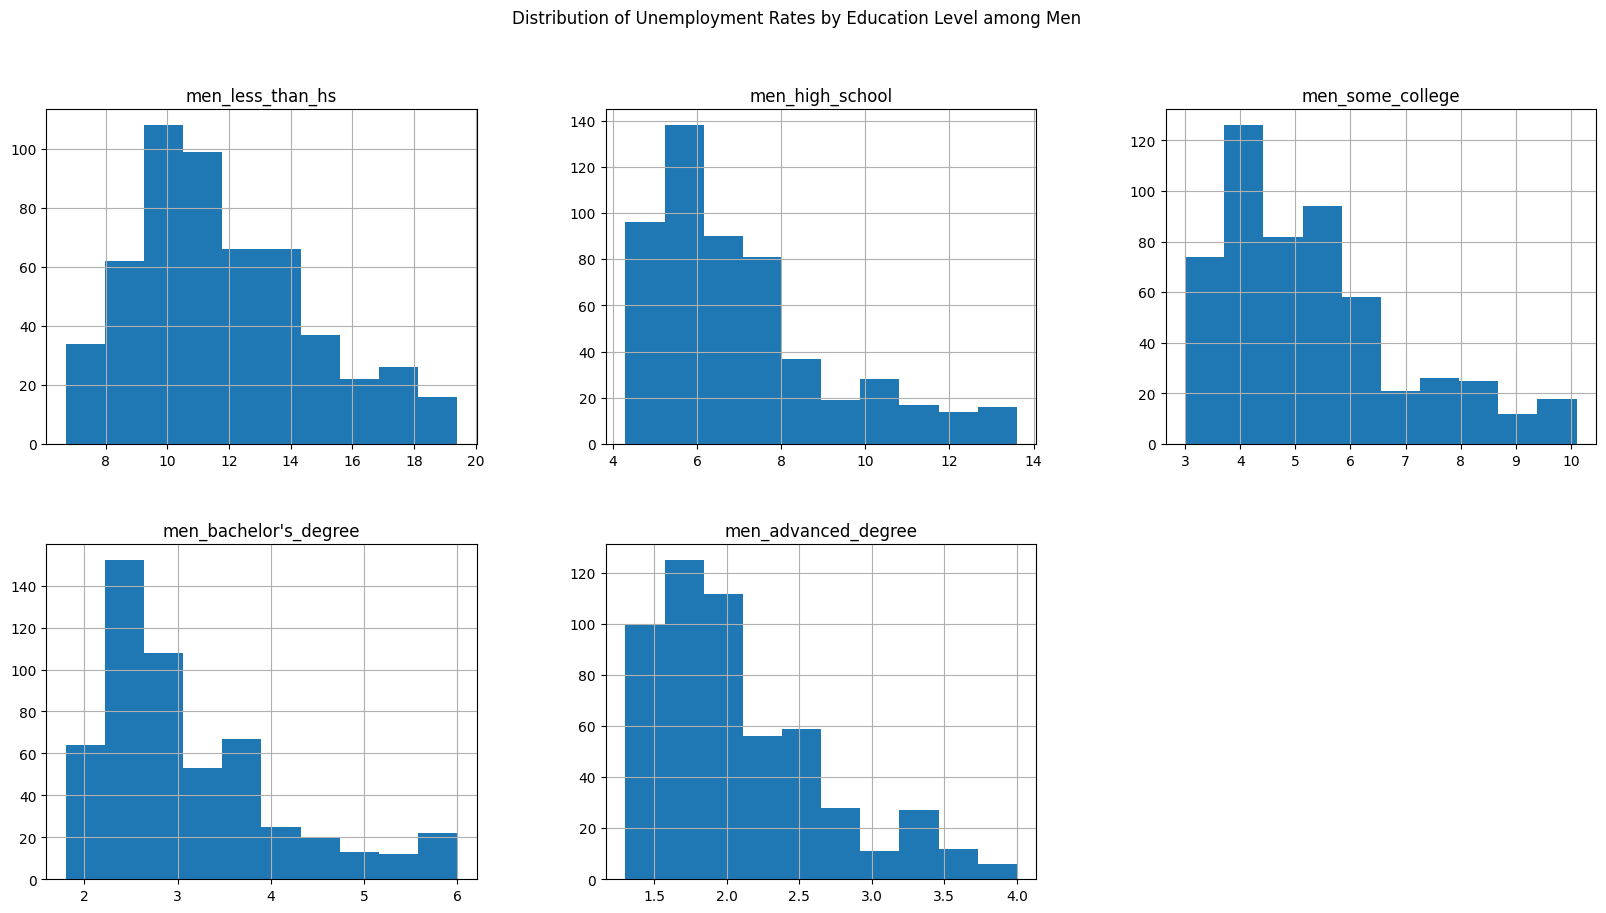

In [155]:
men_education_cols = ["men_less_than_hs", "men_high_school", "men_some_college", "men_bachelor's_degree", "men_advanced_degree"]

unemployed[men_education_cols].hist(bins=10, figsize=(20,10), layout=(2,3) )
plt.suptitle("Distribution of Unemployment Rates by Education Level among Men")
plt.show()